# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [85]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 40
page_size = 100

reviews = []
ratings = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')

    review_blocks = parsed_content.find_all("article", {"itemprop": "review"})
    for review in review_blocks:
      # Get review text
      content = review.find("div", {"class": "text_content"})
      if content:
        reviews.append(content.get_text(strip=True))
#    for para in parsed_content.find_all("div", {"class": "text_content"}):
#        reviews.append(para.get_text())

    # Get review rating from ratingValue
      rating_tag = review.find("span", {"itemprop": "ratingValue"})
      if rating_tag:
        try:
          rating = int(rating_tag.get_text(strip=True))
          ratings.append(rating)
          #if rating == 9:
            #print(f"9 star review: {content.get_text(strip=True)}")
        except ValueError:
          continue

    print(f"   ---> {len(reviews)} reviews, {len(ratings)} ratings so far")

# Count ratings
rating_counts = Counter(ratings)
print("\nRatings distribution:")
for score in range(1, 11):
    print(f"{score} star: {rating_counts.get(score, 0)} reviews")

Scraping page 1
   ---> 100 reviews, 100 ratings so far
Scraping page 2
   ---> 200 reviews, 200 ratings so far
Scraping page 3
   ---> 300 reviews, 300 ratings so far
Scraping page 4
   ---> 400 reviews, 400 ratings so far
Scraping page 5
   ---> 500 reviews, 500 ratings so far
Scraping page 6
   ---> 600 reviews, 600 ratings so far
Scraping page 7
   ---> 700 reviews, 700 ratings so far
Scraping page 8
   ---> 800 reviews, 800 ratings so far
Scraping page 9
   ---> 900 reviews, 900 ratings so far
Scraping page 10
   ---> 1000 reviews, 1000 ratings so far
Scraping page 11
   ---> 1100 reviews, 1100 ratings so far
Scraping page 12
   ---> 1200 reviews, 1200 ratings so far
Scraping page 13
   ---> 1300 reviews, 1300 ratings so far
Scraping page 14
   ---> 1400 reviews, 1400 ratings so far
Scraping page 15
   ---> 1500 reviews, 1500 ratings so far
Scraping page 16
   ---> 1600 reviews, 1600 ratings so far
Scraping page 17
   ---> 1700 reviews, 1700 ratings so far
Scraping page 18
   --->

In [88]:
# Convert counts to percentages
total_ratings = sum(rating_counts.values())
rating_percentages = {score: (rating_counts.get(score, 0) / total_ratings) * 100 for score in range(1, 11)}

print("\nRatings distribution (percentage):")
for score in range(1, 11):
    print(f"{score} star: {rating_percentages[score]:.2f}%")


Ratings distribution (percentage):
1 star: 24.34%
2 star: 11.31%
3 star: 11.03%
4 star: 6.75%
5 star: 6.26%
6 star: 5.19%
7 star: 8.28%
8 star: 9.85%
9 star: 8.40%
10 star: 8.58%


In [102]:
print(total_ratings)

3927


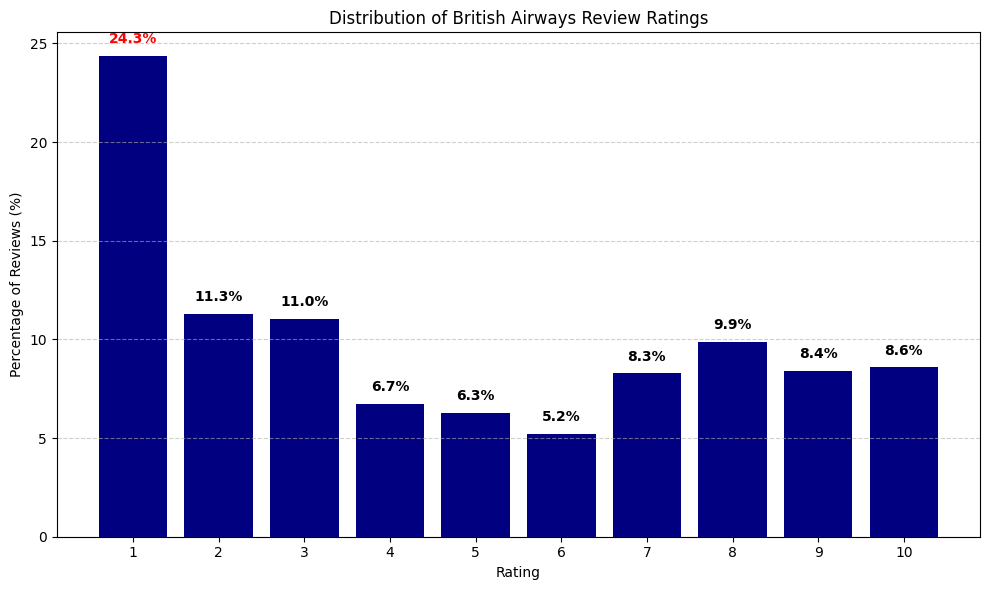

In [101]:
scores = list(range(1, 11))
percentages = [rating_percentages[score] for score in scores]

plt.figure(figsize=(10, 6))
bars = plt.bar(scores, percentages, color='navy')
#plt.bar(scores, percentages, color='navy')
plt.xticks(scores)
plt.xlabel("Rating")
plt.ylabel("Percentage of Reviews (%)")
plt.title("Distribution of British Airways Review Ratings")
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Add annotations
for score, bar, percentage in zip(scores, bars, percentages):
    height = bar.get_height()
    color = 'red' if score == 1 else 'black'
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f"{percentage:.1f}%",
             ha='center', va='bottom', fontsize=10, fontweight='bold', color=color)
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/Forage_BritishAirways/data/rating_percentage_distribution.png")
plt.show()

In [ ]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Having had some rough experi...
1,✅ Trip Verified | This comfortable flight wa...
2,Not Verified | Punta Cana Terminal B check in...
3,✅ Trip Verified | The employee at Venice Air...
4,"✅ Trip Verified | I had only 1 bag with me, ..."


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
path = "/content/drive/MyDrive/Forage_BritishAirways/data"

if not os.path.exists(path):
    os.makedirs(path)

In [ ]:
df.to_csv("/content/drive/MyDrive/Forage_BritishAirways/data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [ ]:
df.head()

,reviews
0,✅ Trip Verified | Having had some rough experi...
1,✅ Trip Verified | This comfortable flight wa...
2,Not Verified | Punta Cana Terminal B check in...
3,✅ Trip Verified | The employee at Venice Air...
4,"✅ Trip Verified | I had only 1 bag with me, ..."


In [ ]:
df_cleaned = df["reviews"].str.replace("✅ Trip Verified", "")
df_cleaned = df_cleaned.str.replace("Not Verified", "")
df_cleaned = df_cleaned.str.replace("|", "")
df_cleaned.head()

,reviews
0,Having had some rough experiences with BA in...
1,This comfortable flight was BA at its best...
2,Punta Cana Terminal B check in was straight...
3,The employee at Venice Airport checkin was...
4,"I had only 1 bag with me, a carry on troll..."


In [ ]:
reviews = pd.DataFrame(df_cleaned)
print(reviews.shape)
if reviews.shape[1] == 1:
  reviews.columns = ["reviews"]
reviews.head()

(3932, 1)


,reviews
0,Having had some rough experiences with BA in...
1,This comfortable flight was BA at its best...
2,Punta Cana Terminal B check in was straight...
3,The employee at Venice Airport checkin was...
4,"I had only 1 bag with me, a carry on troll..."


In [ ]:
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer, AutoConfig
import numpy as np
from scipy.special import softmax

MODEL = f"cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
config = AutoConfig.from_pretrained(MODEL)
# PT
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

for text in reviews:
  encoded_input = tokenizer(text, return_tensors='pt', truncation=True, padding=True)
  output = model(**encoded_input)
  scores = output[0][0].detach().numpy()
  scores = softmax(scores)

# Print labels and scores
ranking = np.argsort(scores)
ranking = ranking[::-1]
for i in range(scores.shape[0]):
    l = config.id2label[ranking[i]]
    s = scores[ranking[i]]
    print(f"{i+1}) {l} {np.round(float(s), 4)}")

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


1) neutral 0.718
2) positive 0.1909
3) negative 0.091


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

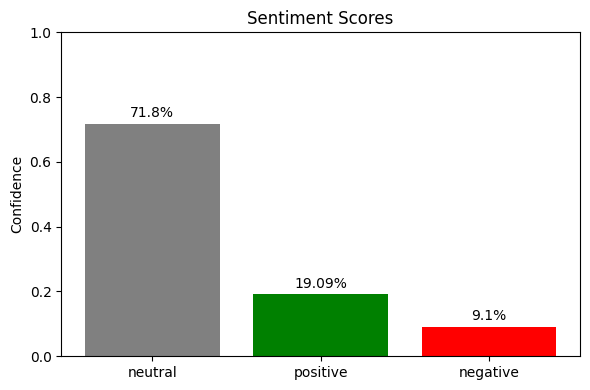

In [ ]:
# Reconstructing labels and scores for plotting
labels = [config.id2label[i] for i in ranking]
scores_sorted = [float(np.round(scores[i], 4)) for i in ranking]

# Plotting
plt.figure(figsize=(6, 4))
plt.bar(labels, scores_sorted, color=['gray', 'green', 'red'])  # Customize as needed
plt.title("Sentiment Scores")
plt.ylabel("Confidence")
plt.ylim(0, 1)
for i, v in enumerate(scores_sorted):
    plt.text(i, v + 0.02, str(np.round(v, 4)*100) +'%', ha='center')

plt.tight_layout()
plt.savefig("/content/drive/MyDrive/Forage_BritishAirways/data/sentiment_scores.png")
plt.show()

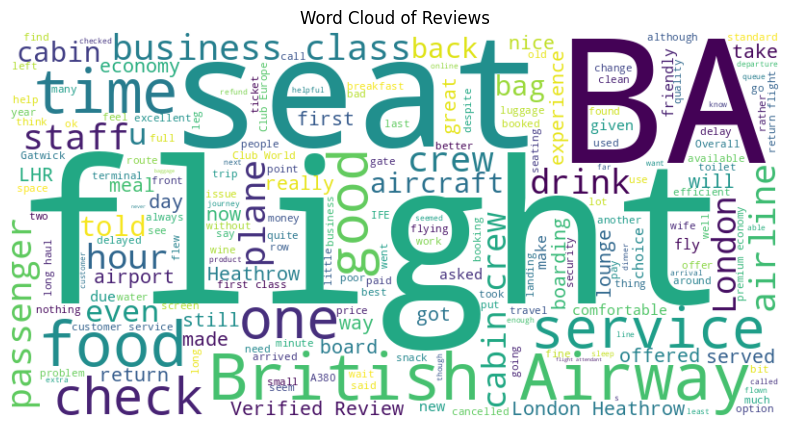

In [ ]:
from wordcloud import WordCloud

# Assuming 'reviews' is a DataFrame with a column of text, e.g., 'review_text'
# Or if it's a simple Series/list of strings
text = " ".join(review for review in reviews["reviews"])

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

# Display it
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Reviews")
plt.savefig("/content/drive/MyDrive/Forage_BritishAirways/data/wordcloud.png")
plt.show()